In [7]:
import matplotlib.pyplot as plt
import tree_utils as tu
from tqdm import tqdm
import networkx as nx
import numpy as np
import random
from sklearn.preprocessing import normalize

In [122]:
def rev_wilsons(g):
    # random.seed(10)
    # root = randomly_pick_root(g)
    # root = (1,0)
    root = pick_root_random_degree(g)
    
    tree = nx.Graph()
    tree.add_node(root)
    
    while tree.number_of_nodes() < g.number_of_nodes():
        add_vertex(g, tree)
    
    return tree

def add_vertex(g, tree):
    frontier = find_frontier(g, tree)
    
    found_vertex = False
    while not found_vertex:
        neighbor = random.choice(frontier)
        random_edge = random.choice(list(g.edges(neighbor)))
        if any([node in random_edge for node in tree.nodes]):
            tree.update(edges=[random_edge])
            found_vertex = True
    return

def find_frontier(g, tree):
    # frontier = set() # weight nodes in the frontier equally
    frontier = list() # weight nodes by how "much" its in the frontier
    
    for node in tree.nodes:
        neighbors = nx.ego_graph(g, node, center=False).nodes # all nodes connected to node in the graph
        for neighbor in neighbors:
            if neighbor not in tree.nodes:
                # frontier.add(neighbor)
                frontier.append(neighbor)
    return list(frontier)

In [123]:
def wilsons(g):
    root = randomly_pick_root(g)
    
    tree = nx.Graph()
    tree.add_node(root)
    
    while tree.number_of_nodes() < g.number_of_nodes():
        add_branch(g, tree)
        
    return tree

def randomly_pick_root(g):
    return random.choice(list(g.nodes))

# Function to perform a weighted random choice TODO: CHECK IF THESE TWO FUNCTIONS ARE CORRECT!
def weighted_choice(choices):
    total = sum(w for c, w in choices.items())
    r = random.uniform(0, total)
    upto = 0
    for c, w in choices.items():
        if upto + w >= r:
            return c
        upto += w

def pick_root_random_degree(g):
    node_degrees = dict(g.degree())
    weighted_nodes = {node: degree for node, degree in node_degrees.items()}
    return weighted_choice(weighted_nodes)
    

def pick_leaf(g, tree):
    candidates = list(set(g.nodes()) - set(tree.nodes()))
    return random.choice(candidates)

def erase_singletons(branch):
    """ Removes the nodes that do not have any edges from the networkx graph ``branch".
    """
    # remove the singletons after erasing the loop
    to_remove = []
    for node in branch.nodes:
        if len(list(branch.neighbors(node))) == 0:
            to_remove.append(node)
    for node in to_remove:
        branch.remove_node(node)
            
def erase_loop_if_exists(branch):
    """ 
    """
    try:
        cycle = nx.find_cycle(branch)
        
        for (u, v) in cycle:
            branch.remove_edge(u, v)
        erase_singletons(branch)
        
    except nx.exception.NetworkXNoCycle:
        pass

def loop_exists(g):
    """ Returns True if cycle exists in graph g.
    """
    try:
        cycle = nx.find_cycle(g)
        return True
    except nx.exception.NetworkXNoCycle:
        return False

def add_branch(g, tree):
    leaf = pick_leaf(g, tree)
    curr = leaf
    branch = nx.Graph()
    reached_root = False
    
    while reached_root is False:
        nxt = random.choice(list(g.neighbors(curr)))
        
        # handle the case of small two edge cycles
        if branch.has_edge(curr, nxt):
            branch.remove_edge(curr, nxt)
            erase_singletons(branch)
            curr = nxt
            continue
            
        
        branch.add_edge(curr, nxt)
        erase_loop_if_exists(branch)
        curr = nxt

        if nxt in tree.nodes():
            reached_root = True
            
    tree = tree.update(branch.edges)

In [65]:
%%time
def test_valid_tree(tree, g):
    assert(len(list(nx.connected_components(tree))) == 1)
    assert(len(tree.edges) == len(g.nodes)-1)

for i in range(1000):
    tree = wilsons(g)
    test_valid_tree(tree, g)
    
    tree = rev_wilsons(g)
    test_valid_tree(tree, g)

CPU times: user 1.62 s, sys: 15.2 ms, total: 1.63 s
Wall time: 1.65 s


15it [00:00, 1389.52it/s]


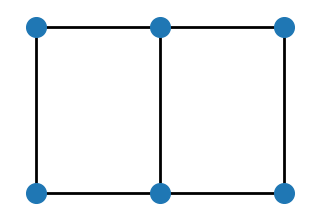

In [124]:
dims = (2, 3)
g = tu.generate_grid_graph(dims, queen=False)
all_trees = [tu.tup(tree) for tree in tu.enumerate_all_trees(g)]
tu.draw(g)

100%|███████████████████████████████████| 10000/10000 [00:04<00:00, 2057.21it/s]


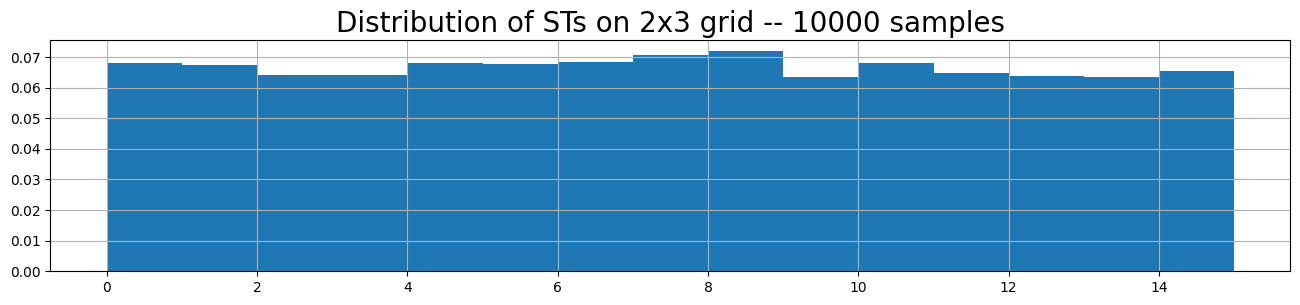

In [76]:
num_trials = 10000
data = []

for _ in tqdm(range(num_trials)):
    tree = wilsons(g)

    idx = all_trees.index(tu.tup(tree))
    data.append(idx)
    
tu.plot_sampled_STs(all_trees, data)

100%|██████████████████████████████████| 100000/100000 [02:28<00:00, 674.33it/s]


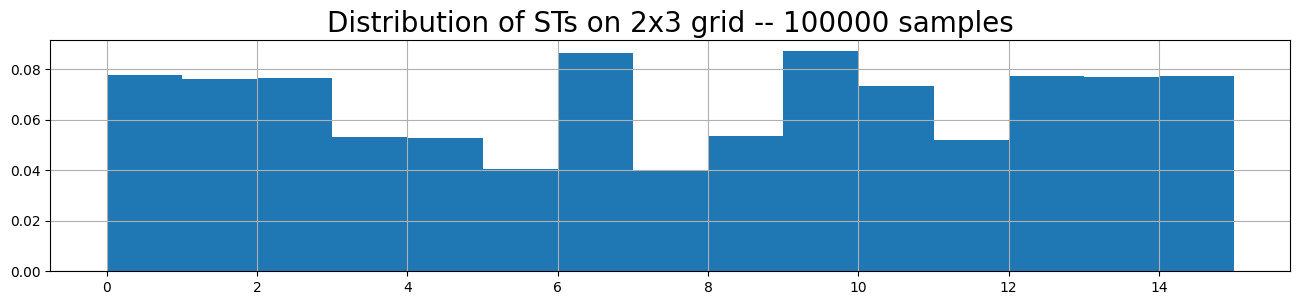

In [126]:
num_trials = 100000
data = []
all_indices = set()

for _ in tqdm(range(num_trials)):
    tree = rev_wilsons(g)

    idx = all_trees.index(tu.tup(tree))
    all_indices.add(idx)
    data.append(idx)
    
tu.plot_sampled_STs(all_trees, data)

15it [00:00, 1992.04it/s]


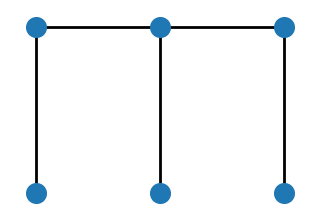

In [117]:
# %%time
high_prob_trees = []
low_prob_trees = []
other_trees = []
for t in tu.enumerate_all_trees(g):
    idx = all_trees.index(tu.tup(t))
    if idx == 9:
        drawing_tree = t
    if idx == 6 or idx == 9:
        high_prob_trees.append(t)
    elif idx == 5 or idx == 7:
        low_prob_trees.append(t)
    else:
        other_trees.append(t)
tu.draw(drawing_tree)

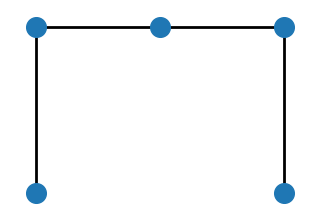

In [118]:
drawing_tree.remove_node((1,0))
tu.draw(drawing_tree)

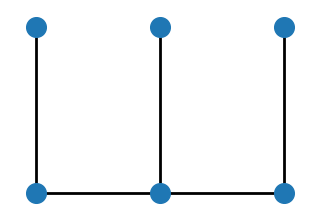

In [ ]:
tu.draw(high_prob_trees[0])

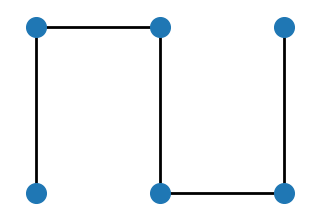

In [61]:
tu.draw(low_prob_trees[1])

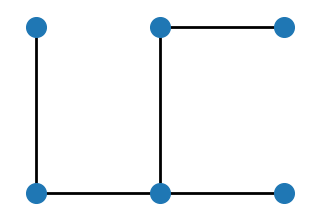

In [63]:
tu.draw(other_trees[2])

In [48]:
other_trees